In [0]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
import sys
sys.path.append ('../')
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [0]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression

In [0]:
PATH = "datasets/"

In [0]:
df_train2 = pd.read_csv(f'{PATH}train.csv', low_memory=False)

In [0]:
df_test1 = pd.read_csv(f'{PATH}test.csv', low_memory=False)
ID = df_test1.Id

In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [0]:
df_main = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

C:\Users\M.Hamza.Naveed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
df_main.drop('Id', axis=1, inplace=True )

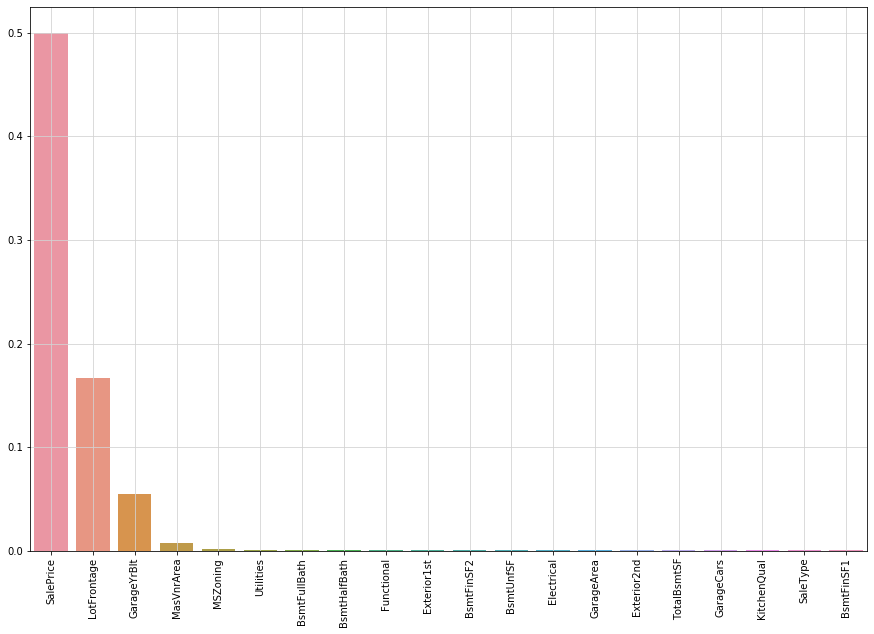

In [0]:
missing = (df_main.isnull().sum()[df_main.isnull().sum()>0] / len(df_main)).sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x=missing[missing>0].index, y=missing[missing>0].values)
plt.xticks(rotation=90)
plt.grid(b=True, color='lightgrey')

In [0]:
train_cats(df_main)

In [0]:
df_main.GarageQual.cat.add_categories('None', inplace=True)
df_main.GarageCond.cat.add_categories('None')
df_main.GarageFinish.cat.add_categories('None')
df_main.PoolQC.cat.add_categories('None')
df_main.Alley.cat.add_categories('None')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2914    NaN
2915    NaN
2916    NaN
2917    NaN
2918    NaN
Name: Alley, Length: 2919, dtype: category
Categories (3, object): [Grvl < Pave < None]

In [0]:
df_main.GarageQual.unique()

[TA, Fa, Gd, NaN, Ex, Po]
Categories (5, object): [Ex < Fa < Gd < Po < TA]

In [0]:
ordinalColumns = [ 'GarageCond', 'GarageFinish', 'PoolQC', 'Alley']
for col in ordinalColumns:
    df_main[col].fillna('None', inplace=True)

In [0]:
df_main.GarageCond.cat.add_categories(new_categories = 'None', inplace = True)
df_main.GarageFinish.cat.add_categories(new_categories = 'None', inplace = True)
df_main.PoolQC.cat.add_categories(new_categories = 'None', inplace = True)
df_main.Alley.cat.add_categories(new_categories = 'None', inplace = True)

In [0]:
df_main.GarageCond.cat.categories

Index(['Ex', 'Fa', 'Gd', 'Po', 'TA', 'None'], dtype='object')

In [0]:
df_main.Alley.cat.set_categories(['Grvl','Pave', 'None'], ordered=True, inplace=True)

In [0]:
df_main.GarageFinish.cat.set_categories(['Fin', 'RFn', 'Unf', 'None'], ordered=True, inplace=True)

In [0]:
df_main.MiscFeature.fillna('Othr', inplace=True)

In [0]:
df_main.Fence.cat.add_categories(new_categories = 'None', inplace = True)
df_main.Fence.cat.set_categories(['GdPrv', 'MnPrv', 'GdWo',  'MnWw', 'None'], ordered=True, inplace=True)
df_main.Fence.fillna('None', inplace=True)

In [0]:
df_main.FireplaceQu.cat.set_categories(['Ex','Gd','TA','Fa','Po', 'None'], ordered=True, inplace=True)
df_main.FireplaceQu.fillna('None', inplace=True)

In [0]:
df_main.FireplaceQu.cat.categories

Index(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], dtype='object')

In [0]:
df_main.GarageType.cat.add_categories(new_categories = 'None', inplace = True)
df_main.GarageType.cat.set_categories(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd','None'], inplace=True)
df_main.GarageType.fillna('None', inplace=True)


In [0]:
df_main.BsmtCond.cat.add_categories(new_categories = 'None', inplace = True)
df_main.BsmtCond.cat.set_categories(['Ex','Gd','TA','Fa','Po', 'None'], ordered=True, inplace=True)
df_main.BsmtCond.fillna('None', inplace=True)

In [0]:
df_main.BsmtExposure.cat.add_categories(new_categories = 'None', inplace = True)
df_main.BsmtExposure.cat.set_categories(['Gd','Av', 'Mn','No', 'None'], ordered=True, inplace=True)
df_main.BsmtExposure.fillna('None', inplace=True)

In [0]:
df_main.BsmtQual.cat.add_categories(new_categories = 'None', inplace = True)
df_main.BsmtQual.cat.set_categories(['Ex','Gd','TA','Fa','Po', 'None'], ordered=True, inplace=True)
df_main.BsmtQual.fillna('None', inplace=True)

In [0]:
df_main.BsmtFinType1.cat.add_categories(new_categories = 'None', inplace = True)
df_main.BsmtFinType1.cat.set_categories(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None'], ordered=True, inplace=True)
df_main.BsmtFinType1.fillna('None', inplace=True)

In [0]:
df_main.BsmtFinType2.cat.add_categories(new_categories = 'None', inplace = True)
df_main.BsmtFinType2.cat.set_categories(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None'], ordered=True, inplace=True)
df_main.BsmtFinType2.fillna('None', inplace=True)

In [0]:
os.makedirs('tmp', exist_ok=True)
df_main.to_feather('tmp/bulldozers-df_main')
train_test.to_feather('tmp/bulldozers-train_test')

In [0]:
df_main = pd.read_feather('tmp/bulldozers-df_main')
train_test = pd.read_feather('tmp/bulldozers-train_test')

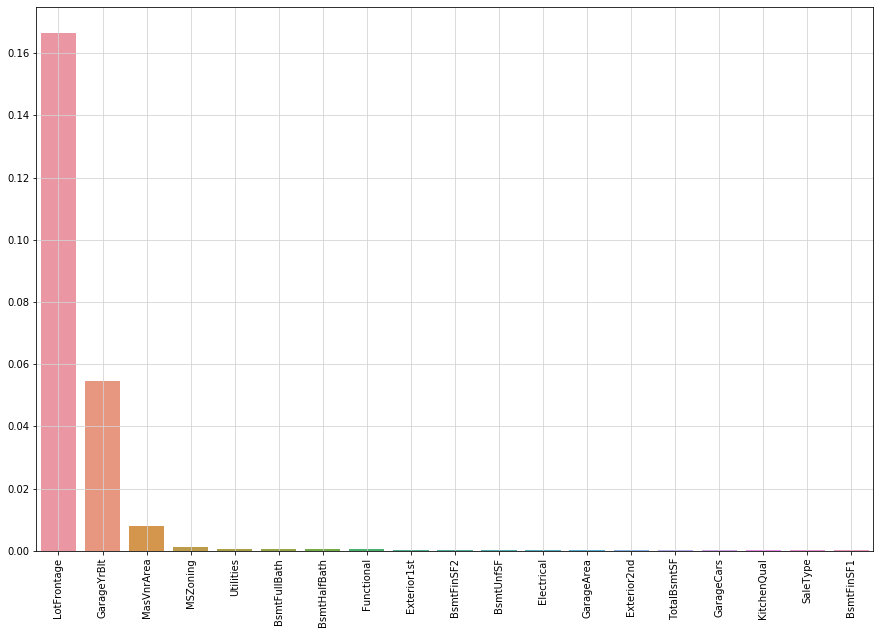

In [0]:
missing = (df_main.isnull().sum()[df_main.isnull().sum()>0] / len(df_main)).sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x=missing[missing>0].index, y=missing[missing>0].values)
plt.xticks(rotation=90)
plt.grid(b=True, color='lightgrey')

In [0]:
SP = df_main.SalePrice
df_main.drop('SalePrice', axis=1,inplace = True)
train_test.drop('SalePrice', axis=1,inplace = True)


In [0]:
cats = []
for x in df_main.columns:
    if is_categorical_dtype(df_main[x]):
        cats.append(x)
cats, len(cats)

(['Alley',
  'BldgType',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'BsmtQual',
  'CentralAir',
  'Condition1',
  'Condition2',
  'Electrical',
  'ExterCond',
  'ExterQual',
  'Exterior1st',
  'Exterior2nd',
  'Fence',
  'FireplaceQu',
  'Foundation',
  'Functional',
  'GarageCond',
  'GarageFinish',
  'GarageQual',
  'GarageType',
  'Heating',
  'HeatingQC',
  'HouseStyle',
  'KitchenQual',
  'LandContour',
  'LandSlope',
  'LotConfig',
  'LotShape',
  'MSZoning',
  'MasVnrType',
  'MiscFeature',
  'Neighborhood',
  'PavedDrive',
  'PoolQC',
  'RoofMatl',
  'RoofStyle',
  'SaleCondition',
  'SaleType',
  'Street',
  'Utilities'],
 43)

In [0]:
for cat in cats:
    if df_main[cat].isnull().sum() >0:
        print(f'{cat}: {df_main[cat].isnull().sum()}')

Electrical: 1
Exterior1st: 1
Exterior2nd: 1
Functional: 2
MSZoning: 4
SaleType: 1
Utilities: 2


In [0]:
df_main.KitchenQual.cat.add_categories(new_categories = 'None', inplace = True)
df_main.KitchenQual.cat.set_categories(['Ex','Gd','TA','Fa','Po', 'None'], ordered=True, inplace=True)
df_main.KitchenQual.fillna('None', inplace=True)

In [0]:
train_test['SalePrice'] = SP
train_test['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2916, dtype: float64

In [0]:
df, y, nas = proc_df(df_main,'SalePrice', max_n_cat=7)

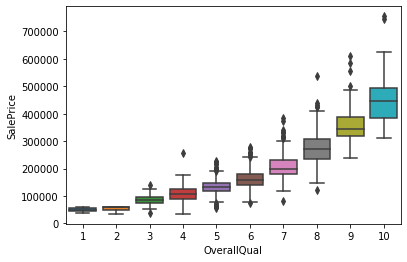

In [0]:
sns.boxplot(df_main.OverallQual, df_main.SalePrice )

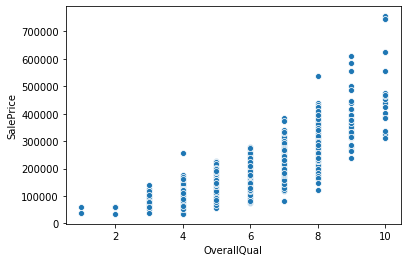

In [0]:
index = df_main[(df_main.OverallQual == 10) & (df_main.SalePrice<200000)].index
df_main = df_main.drop(index,axis=0)

sns.scatterplot(df_main.OverallQual, df_main.SalePrice )

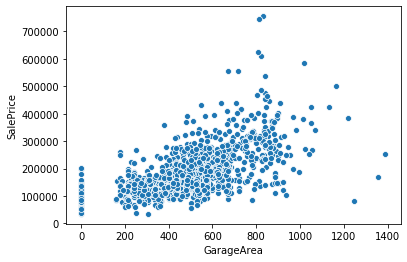

In [0]:
sns.scatterplot(df_main.GarageArea, df_main.SalePrice )

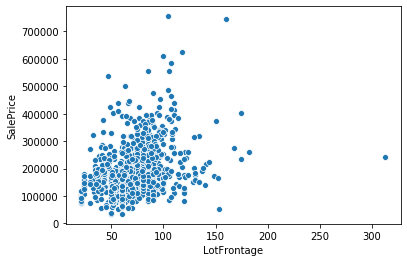

In [0]:
sns.scatterplot(df_main.LotFrontage, df_main.SalePrice )

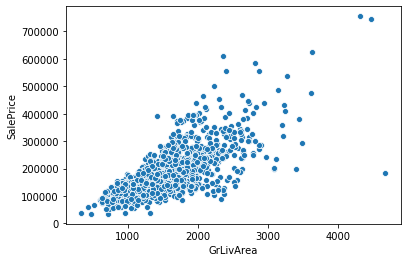

In [0]:
index = df_main[(df_main.GrLivArea>5000) & (df_main.SalePrice<200000)].index
df_main = df_main.drop(index,axis=0)

sns.scatterplot(df_main.GrLivArea, df_main.SalePrice )

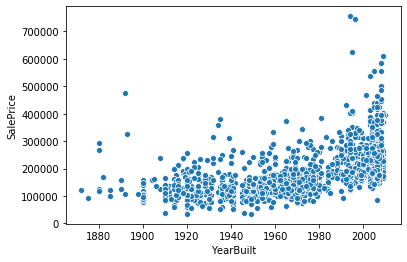

In [0]:
sns.scatterplot(df_main.YearBuilt, df_main.SalePrice )

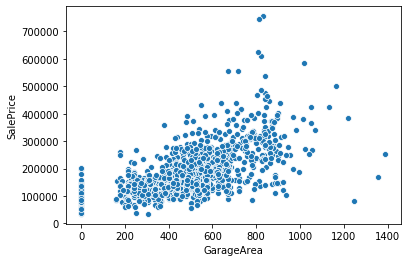

In [0]:
sns.scatterplot(df_main.GarageArea, df_main.SalePrice )

In [0]:
index = df_main[(df_main.GarageArea>1200) & (df_main.SalePrice>300000)].index
df_main = df_main.drop(index,axis=0)

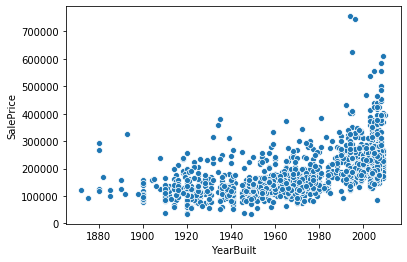

In [0]:
sns.scatterplot(df_main.YearBuilt, df_main.SalePrice )

In [0]:
index = df_main[(df_main.YearBuilt<1900) & (df_main.SalePrice>400000)].index
df_main = df_main.drop(index,axis=0)

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
df, y, nas = proc_df(df_main, 'SalePrice', max_n_cat=7)

In [0]:
df = df[:1456]
y = y[:1456]
df.shape, y.shape, df_main.shape

((1456, 261), (1456,), (2915, 80))

In [0]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

C:\Users\M.Hamza.Naveed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9751766697009102

In [0]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 356 
n_trn = len(df)-n_valid #1459

X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1100, 261), (1100,), (356, 261), (356,))

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)

[14954.88105597713, 29168.446762366162, 0.9641020037079353, 0.8639363903275644, 0.8706111410797998]


In [0]:
y = np.log(y)

In [0]:
df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df_main.to_feather('tmp/bulldozers-dfM')
df.to_feather('tmp/bulldozers-df')
y.to_feather('tmp/bulldozers-df_main')

In [0]:
df_main = pd.read_feather('tmp/bulldozers-dfM')
train_test = pd.read_feather('tmp/bulldozers-train_test')
df = pd.read_feather('tmp/bulldozers-df')

In [0]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
33,OverallQual,0.590126
19,GrLivArea,0.114932
39,TotalBsmtSF,0.046506
0,1stFlrSF,0.033890
4,BsmtFinSF1,0.030250
17,GarageCars,0.022024
38,TotRmsAbvGrd,0.018119
23,LotArea,0.017033
16,GarageArea,0.012860
41,YearBuilt,0.010195


In [0]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [0]:
dfNew = df_main.copy()

In [0]:
col  = dfNew.columns
res = [i for i in col if 'Porch' in i]
res
dfNew.Fireplaces

0       0
1       1
2       1
3       1
4       1
       ..
2910    0
2911    0
2912    1
2913    0
2914    1
Name: Fireplaces, Length: 2915, dtype: int64

In [0]:
dfNew['TotalFloorsSF'] = dfNew['1stFlrSF'] + dfNew['2ndFlrSF']
dfNew['TotalPorchSF'] = dfNew.OpenPorchSF + dfNew.EnclosedPorch + dfNew.OpenPorchSF + dfNew.ScreenPorch + dfNew.WoodDeckSF
dfNew['TotalBaths'] = dfNew.BsmtFullBath + (0.5* dfNew.BsmtHalfBath) + dfNew.FullBath + (0.5 * dfNew.HalfBath)
dfNew['TotalSF'] = dfNew.GrLivArea + dfNew.TotalBsmtSF 
dfNew['Age'] =     dfNew.YrSold - dfNew.YearBuilt

dfNew.shape

(2915, 85)

In [0]:

dfNew['HasPool'] = dfNew.PoolQC.map(lambda x: 0 if x=='None' else 1)
dfNew['HasGarage'] = dfNew.GarageFinish.map(lambda x: 0 if x=='None' else 1)
dfNew['HasFireplace'] = dfNew.Fireplaces.map(lambda x: 1 if x>0 else 0)
dfNew['HasBasement'] = dfNew.TotalBsmtSF.map(lambda x: 1 if x>0 else 0)
dfNew['AllStoriesFinished'] = dfNew.HouseStyle.map(lambda x: 0 if (x=='1.5Unf' or x=='2.5Unf') else 1)
dfNew['CanHold2Cars'] = dfNew.GarageCars.map(lambda x: 1 if x>=2 else 0)
dfNew['AfterCrisis'] = dfNew.YrSold.map(lambda x: 1 if x>=2008 else 0) 


In [0]:
dfNew[dfNew.HasPool == 1]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotalBaths,TotalSF,Age,HasPool,HasGarage,HasFireplace,HasBasement,AllStoriesFinished,CanHold2Cars,AfterCrisis
196,1360,1360,0,None,4,1Fam,TA,No,1036.0,184.0,...,3.5,4472.0,88,1,1,1,1,1,1,0
808,1309,0,0,None,3,1Fam,TA,No,663.0,377.0,...,2.5,2349.0,32,1,1,1,1,1,1,0
1167,1118,0,0,None,3,1Fam,TA,Av,522.0,0.0,...,2.0,2214.0,31,1,1,1,1,1,0,1
1179,2411,2065,0,None,4,1Fam,TA,Av,2096.0,0.0,...,4.5,6872.0,11,1,1,1,1,1,1,0
1382,1392,1392,0,None,5,1Fam,TA,No,790.0,469.0,...,4.5,4176.0,28,1,1,1,1,1,1,0
1419,1575,626,0,None,4,1Fam,TA,Av,0.0,0.0,...,2.0,2898.0,40,1,1,1,1,1,1,0
1970,2470,0,0,None,1,1Fam,TA,Gd,2257.0,0.0,...,3.5,5005.0,5,1,1,1,1,1,1,1
2569,2726,0,0,None,2,1Fam,TA,No,0.0,0.0,...,2.5,3005.0,21,1,1,1,1,1,1,0
2706,2151,495,0,None,3,1Fam,TA,Gd,1023.0,497.0,...,4.0,4394.0,32,1,1,1,1,1,1,0


In [0]:
df, y, nas = proc_df(dfNew, 'SalePrice', max_n_cat=7)

In [0]:
dfT = df[1456:]
df = df[:1456]
y = y[:1456]

In [0]:
n_valid = 356 
n_trn = len(df)-n_valid #1459

X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1100, 275), (1100,), (356, 275), (356,))

In [0]:
m = RandomForestRegressor(n_estimators=80, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0511832660071272, 0.13207726538363737, 0.9838588554066893, 0.8815980756107595, 0.8821149184624403]


In [0]:
fi = rf_feat_importance(m, df); fi[:10]


,cols,imp
47,TotalSF,0.291637
33,OverallQual,0.263627
44,TotalFloorsSF,0.057722
41,YearBuilt,0.048234
48,Age,0.038238
19,GrLivArea,0.025444
46,TotalBaths,0.023196
17,GarageCars,0.021799
16,GarageArea,0.017447
0,1stFlrSF,0.014598


In [0]:
df1, y1, nas1 = proc_df(dfNew, 'SalePrice', max_n_cat=7)

df1 = df1[1456: ]

In [0]:
dfTrain = dfNew[:1456]
dfTest = dfNew[1456:]
dfTest.drop('SalePrice', axis=1, inplace=True)
sub = m.predict(df1)
len(sub)

C:\Users\M.Hamza.Naveed\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


1459

In [0]:
submission

,Id,SalePrice
0,1461,11.700476
1,1462,11.980274
2,1463,12.120298
3,1464,12.183289
4,1465,12.148497
...,...,...
1454,2915,11.349345
1455,2916,11.383515
1456,2917,11.941095
1457,2918,11.697690


In [0]:
dfT.shape

(1459, 275)

In [0]:
sub = m.predict(dfT)
sub =np.expm1(sub)
submission = pd.DataFrame()
submission['Id'] = ID
submission['SalePrice'] = sub
submission.head()
submission.to_csv("myBestSub2.csv", index=False)

In [0]:
m = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, n_jobs=-1,max_features=0.5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [0]:
y =np.concatenate((y, ySal.SalePrice.values))

In [0]:
dfNew.SalePrice = y

In [0]:
y = dfNew.SalePrice
y = y[:1456]

In [0]:
ySal.SalePrice = np.log(ySal.SalePrice)